In [1]:
pip install mlxtend

In [2]:
transactions = [['Bread', 'Milk'],
                ['Bread', 'Cheese', 'Juice', 'Eggs'],
                ['Milk', 'Cheese', 'Juice', 'Coke' ],
                ['Bread', 'Milk', 'Cheese', 'Juice'],
                ['Bread', 'Milk', 'Cheese', 'Coke']]


from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()

te.fit(transactions)

rows = te.transform(transactions)
print(rows)

[[ True False False False False  True]
 [ True  True False  True  True False]
 [False  True  True False  True  True]
 [ True  True False False  True  True]
 [ True  True  True False False  True]]


In [3]:
import pandas as pd

df_transactions = pd.DataFrame(rows, columns=te.columns_)
df_transactions

,Bread,Cheese,Coke,Eggs,Juice,Milk
0,True,False,False,False,False,True
1,True,True,False,True,True,False
2,False,True,True,False,True,True
3,True,True,False,False,True,True
4,True,True,True,False,False,True


In [4]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df_transactions, min_support=0.4, use_colnames=True)

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,support,itemsets,length
0,0.8,(Bread),1
1,0.8,(Cheese),1
2,0.4,(Coke),1
3,0.6,(Juice),1
4,0.8,(Milk),1
5,0.6,"(Cheese, Bread)",2
6,0.4,"(Juice, Bread)",2
7,0.6,"(Milk, Bread)",2
8,0.4,"(Cheese, Coke)",2
9,0.6,"(Juice, Cheese)",2


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [5]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

rules = rules.sort_values(['confidence'], ascending =[False])
rules

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(Coke),(Milk),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
5,(Coke),(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
6,(Juice),(Cheese),0.6,0.8,0.6,1.000000,1.250000,1.0,0.12,inf,0.500000,0.750000,1.000000,0.875000
20,"(Milk, Coke)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
21,"(Cheese, Coke)",(Milk),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
22,(Coke),"(Milk, Cheese)",0.4,0.6,0.4,1.000000,1.666667,1.0,0.16,inf,0.666667,0.666667,1.000000,0.833333
24,"(Juice, Milk)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
14,"(Juice, Bread)",(Cheese),0.4,0.8,0.4,1.000000,1.250000,1.0,0.08,inf,0.333333,0.500000,1.000000,0.750000
3,(Milk),(Bread),0.8,0.8,0.6,0.750000,0.937500,1.0,-0.04,0.8,-0.250000,0.600000,-0.250000,0.750000
0,(Cheese),(Bread),0.8,0.8,0.6,0.750000,0.937500,1.0,-0.04,0.8,-0.250000,0.600000,-0.250000,0.750000


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

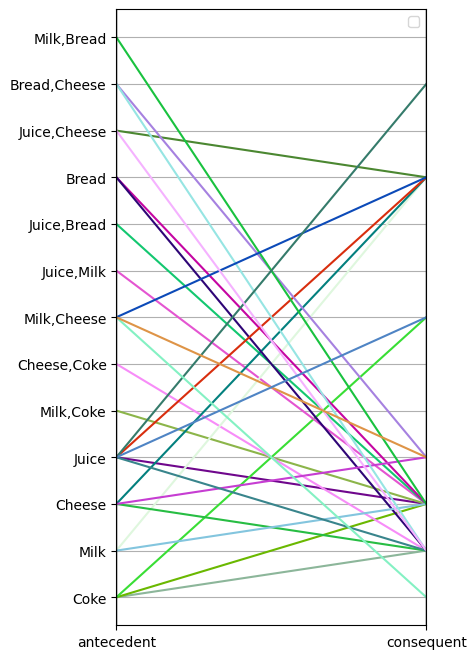

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [6]:
from matplotlib import pyplot as plt
from pandas.plotting import parallel_coordinates

rules['antecedent'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))

rules['consequent'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

rules['rule_n'] = rules.index

coords=rules[['antecedent','consequent','rule_n']]

plt.figure(figsize=(4,8))

parallel_coordinates(coords, 'rule_n')

plt.legend([])

plt.grid(True)
plt.show()

In [7]:
import seaborn as sns

matrix = rules.pivot(index = 'antecedent', columns = 'consequent', values= 'confidence')
matrix

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

consequent,Bread,"Bread,Cheese",Cheese,Coke,Juice,Milk,"Milk,Cheese"
antecedent,,,,,,,
Bread,NaN,NaN,0.750000,NaN,NaN,0.750000,NaN
"Bread,Cheese",NaN,NaN,NaN,NaN,0.666667,0.666667,NaN
Cheese,0.750000,NaN,NaN,NaN,0.750000,0.750000,NaN
"Cheese,Coke",NaN,NaN,NaN,NaN,NaN,1.000000,NaN
Coke,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000
Juice,0.666667,0.666667,1.000000,NaN,NaN,0.666667,0.666667
"Juice,Bread",NaN,NaN,1.000000,NaN,NaN,NaN,NaN
"Juice,Cheese",0.666667,NaN,NaN,NaN,NaN,0.666667,NaN
"Juice,Milk",NaN,NaN,1.000000,NaN,NaN,NaN,NaN


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

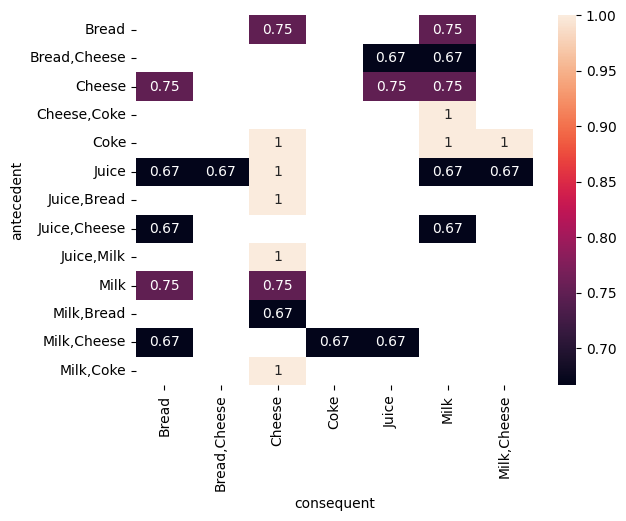

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
sns.heatmap(matrix, annot = True)

plt.yticks(rotation=0)

plt.xticks(rotation=90)
plt.show()

In [9]:
def predict(items, rules, max_results= 6):

    preds = rules[rules['antecedents'] == items]

    preds = preds[['consequent','confidence']]

    preds.sort_values('confidence', ascending=False)

    return preds[:max_results]

preds = predict({'Cheese','Milk'}, rules)
preds

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,consequent,confidence
16,Bread,0.666667
19,Coke,0.666667
25,Juice,0.666667


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
